In [1]:
import wandb
import numpy as np
from wandb.sklearn import plot_precision_recall, plot_feature_importances
from wandb.sklearn import plot_class_proportions, plot_learning_curve, plot_roc

In [4]:
# Import amazon data
from data import X_train, X_val, X_test, y_train, y_val, y_test, X_train_unbalanced, X_val_unbalanced, X_test_unbalanced, y_train_unbalanced, y_val_unbalanced, y_test_unbalanced

# train model
from model_nb import NaiveBayesModelBuilder

from utils import plot_confusion_matrix

F1 score: 0.52
Accuracy: 0.43
              precision    recall  f1-score   support

         1.0       0.19      0.50      0.27        10
         2.0       0.00      0.00      0.00         3
         3.0       0.09      0.33      0.14         6
         4.0       0.10      0.24      0.14        21
         5.0       0.94      0.46      0.62       157

    accuracy                           0.43       197
   macro avg       0.26      0.31      0.23       197
weighted avg       0.77      0.43      0.52       197



/opt/homebrew/anaconda3/envs/ai/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/ai/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/ai/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/ai/lib/python3.11/site-packages/IPython/core/

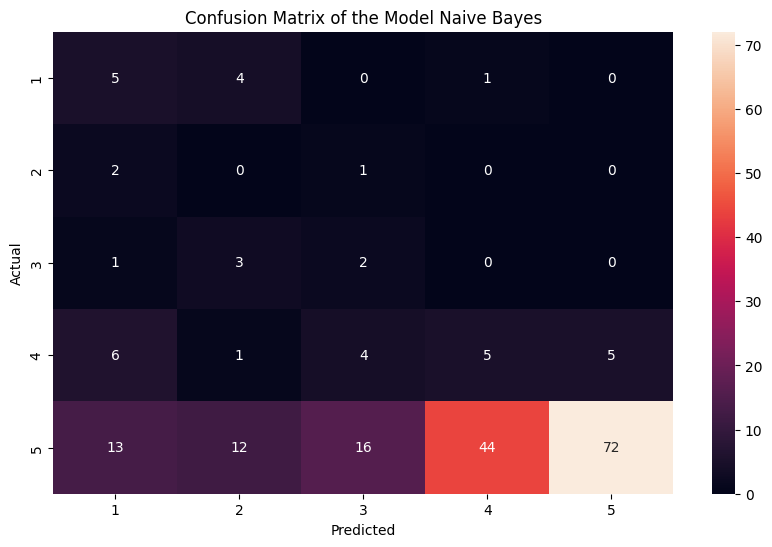

In [8]:
model_nb = NaiveBayesModelBuilder()
model_nb.train(X_train, y_train)

# get predictions (on validation set)
y_pred = model_nb.evaluate(X_val_unbalanced, y_val_unbalanced)

plot_confusion_matrix(model_nb.get_model(), X_val_unbalanced, y_val_unbalanced, 'Naive Bayes')

In [10]:
model = model_nb.get_model()
# start a new wandb run and add your model hyperparameters
wandb.init(project='hlt-project')

# Add additional configs to wandb
wandb.config.update({"test_size" : 0.2,
                    "train_len" : len(X_train),
                    "test_len" : len(X_test)})

# log additional visualisations to wandb
plot_class_proportions(y_train, y_test, y_pred)
plot_learning_curve(model, X_train, y_train)
#plot_roc(y_test)
#plot_precision_recall(y_test, y_test, y_pred)
plot_feature_importances(model)

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: ERROR X contains values that are not numbers. Please vectorize, label encode or one hot encode X and call the plotting function again.
wandb: ERROR Please fit the model before passing it in.
